# Necesarry imports and other enviroment variables

In [1]:
import time
import gym
import numpy as np
import matplotlib.pyplot as plt
rewardarr = []
env = gym.make('MountainCar-v0')

# Training the first version of the network (goal is to get a randomly generated pattern that works and take this to the next genration) 
# IT IS IMPORTANT TO KEEP IN MIND THAT THIS IS A SELF MADE Q LEARNING MODEL. The only reward present is reaching the flag. For more information on the actual model go to the next markdown
<BR>
<BR>
Here we see that the 3rd traiing session had the best results we will take the input of these results and take them to the next generation. This was a test run to see if i could somehow create a network that teaches itself.

In [48]:
# Save array of actions made (this is done for personal use to visualize results, to understand the enviroment)
observationarr= []
rewardarr = []
donearr = []
infoarr = []
actionarr = []
# Keep track of the train session
Train_session = 0
for trainsession in range(10):
    print()
    env.reset()
    # Save array of actions made (this is done for personal use to visualize results, to understand the enviroment)
    observationarr1= []
    rewardarr1 = []
    donearr1 = []
    infoarr1 = []
    actionarr1 = []
    x = -1
    while x != 0.6:
        env.render()
        # movements from env.action_space.sample() = 0 going backwards, 1 nearly stationary and 2 going foward
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        env.step(action)
        observationarr1.append(observation)
        x = observation[0]
        rewardarr1.append(reward)
        infoarr1.append(info)
        donearr1.append(done)
        actionarr1.append(action)
    observationarr.append(observationarr1)
    rewardarr.append(rewardarr1)
    donearr.append(donearr1)
    infoarr.append(infoarr1)
    actionarr.append(actionarr1)
    Train_session = Train_session + 1
    print('Train sesssion: '+str(Train_session) + " Epoch needed to succed: " + str(len(rewardarr1)))
env.close()


Train sesssion: 1 Epoch needed to succed: 203

Train sesssion: 2 Epoch needed to succed: 2281

Train sesssion: 3 Epoch needed to succed: 3193

Train sesssion: 4 Epoch needed to succed: 2943

Train sesssion: 5 Epoch needed to succed: 4905

Train sesssion: 6 Epoch needed to succed: 4795

Train sesssion: 7 Epoch needed to succed: 949

Train sesssion: 8 Epoch needed to succed: 8427

Train sesssion: 9 Epoch needed to succed: 3524

Train sesssion: 10 Epoch needed to succed: 2502


# Functions that are necesarry to run the code
This is done so we can understand and possibly see why certrain itterations did a better job.

In [2]:
def get_best_from_gen(arrayofobs,parentbest):
    # Get the best value from the generation, this can be 2 cases:
                                                                # 1. Parent is better than child (then the parent will be used)
                                                                # 2. The best performing child
    x = 0
    smallestnr = 3000
    small = 0
    returnarr = []
    for i in arrayofobs:
        currentnr = len(arrayofobs[x])
        if currentnr <= smallestnr:
            smallestnr = currentnr
            small = x
            returnarr = arrayofobs[x]
        x = x + 1

    if len(parentbest) > smallestnr:
        print('Child better than parent')
        return returnarr
    else:
        print('Parent better than child')
        return parentbest
    
def generate_array():
    # The first generation does not start with an array so a random array is generated with the actions to take.
    array_size = np.random.randint(1000,2000)
    array = []
    i = 0
    while i < array_size:
        array.append(np.random.randint(0,2))
        i = i + 1
    return array

def plot_graph(observationarr):
    # Plotting the results after the training, this will be used to see how the traingin grows.
    x = 0
    small = 0
    smallestnr = 10000
    for i in observationarr:
        currentnr = len(observationarr[x])
        if currentnr < smallestnr:
            smallestnr = currentnr
            small = x
        Title = 'Generation: ' + str(x) + ' Best genfitness: ' + str(smallestnr)
        plt.title(Title)
        plt.plot(observationarr[x])
        plt.show()
        x = x + 1

# Make the Q learning network, finding the most efficient way to climb the mountain
## How does my network work?

Conclusion can be read after the result of the network
<br>
<br>
The network gets a result of wether the action is good or bad on a whole trial.
<br>
<br>
For the first generation the input variables is generated by a random array. The input variable are the actions the network takes.
<br>
- State: The state that is given is one of two, sucess or failure. The state is only measured at the end of an iteration. This is measured by the distance that the car has driven, if it gets to -60 it has reached a sucessfull attempt.
    - I allow the variable to have a maximum of twice the lenght of the parent. As we are looking for improvement.
- Action: The initial action is the randomnized array. With the input of either the first generation (or the coming the following options are possible):
    - X actions are going to be taken from the parent (i only worked out to do this from the start)
    - Once the X action has been reached the network will take randomly generated paths to try and find a more optimal route. If a more optimal route is found the network will then take this route as the input for the next generation. 
- Q learning aspect: My network is kind of a self created algorithm, where the network learns to play itself. So instead of using E-Greedy i used the random state that the gym enviroment gives itself.
<br>
<br>
Below you can see an image of how the neetwork works. Keep in mind that the network sees the whole iteration as the action that is taken. And gives a reward value based on this.

<img src="RL network.png">

# Network

Generation summary: Number of actions to reach succes - 1864
--------------------------------------------------------------------------------------
Generation: 0 Parent lenght: 1864
--------------------------------------------------------------------------------------
Generation: 0 Offspring: 1 Duration: 62.18924021720886 Actions needed to succed: 3729
--------------------------------------------------------------------------------------
Generation: 0 Offspring: 2 Duration: 30.85188364982605 Actions needed to succed: 1851
--------------------------------------------------------------------------------------
Generation: 0 Offspring: 3 Duration: 52.618542194366455 Actions needed to succed: 3157
--------------------------------------------------------------------------------------
Generation: 0 Offspring: 4 Duration: 62.15218257904053 Actions needed to succed: 3729
--------------------------------------------------------------------------------------
Generation: 0 Offspring: 5 Duration: 6

--------------------------------------------------------------------------------------
Generation: 4 Offspring: 43 Duration: 36.38565254211426 Actions needed to succed: 2183
--------------------------------------------------------------------------------------
Generation: 4 Offspring: 44 Duration: 36.38469934463501 Actions needed to succed: 2183
--------------------------------------------------------------------------------------
Generation: 4 Offspring: 45 Duration: 36.385157108306885 Actions needed to succed: 2183
--------------------------------------------------------------------------------------
Generation: 4 Offspring: 46 Duration: 36.38485050201416 Actions needed to succed: 2183
--------------------------------------------------------------------------------------
Generation: 4 Offspring: 47 Duration: 35.40198087692261 Actions needed to succed: 2124
--------------------------------------------------------------------------------------
Generation: 4 Offspring: 48 Duration: 23.8

--------------------------------------------------------------------------------------
Generation: 8 Offspring: 86 Duration: 20.019838571548462 Actions needed to succed: 1201
--------------------------------------------------------------------------------------
Generation: 8 Offspring: 87 Duration: 20.010581016540527 Actions needed to succed: 1201
--------------------------------------------------------------------------------------
Generation: 8 Offspring: 88 Duration: 20.01701855659485 Actions needed to succed: 1201
--------------------------------------------------------------------------------------
Generation: 8 Offspring: 89 Duration: 20.027396202087402 Actions needed to succed: 1201
--------------------------------------------------------------------------------------
Generation: 8 Offspring: 90 Duration: 20.00785231590271 Actions needed to succed: 1201
Child better than parent
Generation summary: Number of actions to reach succes - 600
------------------------------------------

--------------------------------------------------------------------------------------
Generation: 12 Offspring: 128 Duration: 18.750760078430176 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 12 Offspring: 129 Duration: 18.750917673110962 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 12 Offspring: 130 Duration: 18.750837087631226 Actions needed to succed: 1125
Child better than parent
Generation summary: Number of actions to reach succes - 562
--------------------------------------------------------------------------------------
Generation: 13 Parent lenght: 562
--------------------------------------------------------------------------------------
Generation: 13 Offspring: 131 Duration: 16.351147890090942 Actions needed to succed: 981
--------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------
Generation: 16 Offspring: 170 Duration: 12.451754570007324 Actions needed to succed: 747
Child better than parent
Generation summary: Number of actions to reach succes - 562
--------------------------------------------------------------------------------------
Generation: 17 Parent lenght: 562
--------------------------------------------------------------------------------------
Generation: 17 Offspring: 171 Duration: 18.731921195983887 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 17 Offspring: 172 Duration: 18.757355451583862 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 17 Offspring: 173 Duration: 18.740611791610718 Actions needed to succed: 1125
--------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------
Generation: 21 Offspring: 211 Duration: 18.75142788887024 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 21 Offspring: 212 Duration: 18.750412940979004 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 21 Offspring: 213 Duration: 18.752440452575684 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 21 Offspring: 214 Duration: 18.74979853630066 Actions needed to succed: 1125
--------------------------------------------------------------------------------------
Generation: 21 Offspring: 215 Duration: 13.367341041564941 Actions needed to succed: 802
--------------------------------------------------------------------------------------
Generation: 21 Offspring: 216 D

--------------------------------------------------------------------------------------
Generation: 25 Offspring: 253 Duration: 5.216716051101685 Actions needed to succed: 313
--------------------------------------------------------------------------------------
Generation: 25 Offspring: 254 Duration: 8.616614580154419 Actions needed to succed: 517
--------------------------------------------------------------------------------------
Generation: 25 Offspring: 255 Duration: 8.617132186889648 Actions needed to succed: 517
--------------------------------------------------------------------------------------
Generation: 25 Offspring: 256 Duration: 4.217743635177612 Actions needed to succed: 253
--------------------------------------------------------------------------------------
Generation: 25 Offspring: 257 Duration: 8.61648678779602 Actions needed to succed: 517
--------------------------------------------------------------------------------------
Generation: 25 Offspring: 258 Duration:

--------------------------------------------------------------------------------------
Generation: 29 Offspring: 296 Duration: 4.166658878326416 Actions needed to succed: 250
--------------------------------------------------------------------------------------
Generation: 29 Offspring: 297 Duration: 8.284484386444092 Actions needed to succed: 497
--------------------------------------------------------------------------------------
Generation: 29 Offspring: 298 Duration: 8.282954454421997 Actions needed to succed: 497
--------------------------------------------------------------------------------------
Generation: 29 Offspring: 299 Duration: 8.283634185791016 Actions needed to succed: 497
--------------------------------------------------------------------------------------
Generation: 29 Offspring: 300 Duration: 8.282699584960938 Actions needed to succed: 497
Child better than parent
Generation summary: Number of actions to reach succes - 248
----------------------------------------

--------------------------------------------------------------------------------------
Generation: 33 Offspring: 339 Duration: 7.082975149154663 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Generation: 33 Offspring: 340 Duration: 3.5337696075439453 Actions needed to succed: 212
Child better than parent
Generation summary: Number of actions to reach succes - 212
--------------------------------------------------------------------------------------
Generation: 34 Parent lenght: 212
--------------------------------------------------------------------------------------
Generation: 34 Offspring: 341 Duration: 7.082856178283691 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Generation: 34 Offspring: 342 Duration: 7.0838704109191895 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Gener

--------------------------------------------------------------------------------------
Generation: 38 Offspring: 381 Duration: 4.965583086013794 Actions needed to succed: 298
--------------------------------------------------------------------------------------
Generation: 38 Offspring: 382 Duration: 3.533881664276123 Actions needed to succed: 212
--------------------------------------------------------------------------------------
Generation: 38 Offspring: 383 Duration: 7.083529472351074 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Generation: 38 Offspring: 384 Duration: 7.084136724472046 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Generation: 38 Offspring: 385 Duration: 7.083247423171997 Actions needed to succed: 425
--------------------------------------------------------------------------------------
Generation: 38 Offspring: 386 Duration

--------------------------------------------------------------------------------------
Generation: 42 Offspring: 424 Duration: 6.9146363735198975 Actions needed to succed: 415
--------------------------------------------------------------------------------------
Generation: 42 Offspring: 425 Duration: 6.915562391281128 Actions needed to succed: 415
--------------------------------------------------------------------------------------
Generation: 42 Offspring: 426 Duration: 6.920879602432251 Actions needed to succed: 415
--------------------------------------------------------------------------------------
Generation: 42 Offspring: 427 Duration: 6.914837837219238 Actions needed to succed: 415
--------------------------------------------------------------------------------------
Generation: 42 Offspring: 428 Duration: 6.927964448928833 Actions needed to succed: 415
--------------------------------------------------------------------------------------
Generation: 42 Offspring: 429 Duratio

--------------------------------------------------------------------------------------
Generation: 46 Offspring: 467 Duration: 6.823163032531738 Actions needed to succed: 409
--------------------------------------------------------------------------------------
Generation: 46 Offspring: 468 Duration: 6.813966274261475 Actions needed to succed: 409
--------------------------------------------------------------------------------------
Generation: 46 Offspring: 469 Duration: 6.82265305519104 Actions needed to succed: 409
--------------------------------------------------------------------------------------
Generation: 46 Offspring: 470 Duration: 6.820989608764648 Actions needed to succed: 409
Child better than parent
Generation summary: Number of actions to reach succes - 204
--------------------------------------------------------------------------------------
Generation: 47 Parent lenght: 204
--------------------------------------------------------------------------------------
Generati

--------------------------------------------------------------------------------------
Generation: 50 Offspring: 510 Duration: 3.383535385131836 Actions needed to succed: 203
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 51 Parent lenght: 203
--------------------------------------------------------------------------------------
Generation: 51 Offspring: 511 Duration: 6.7839131355285645 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 51 Offspring: 512 Duration: 6.783241510391235 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 51 Offspring: 513 Duration: 6.783568620681763 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Genera

--------------------------------------------------------------------------------------
Generation: 55 Offspring: 551 Duration: 6.783356428146362 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 55 Offspring: 552 Duration: 6.782736778259277 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 55 Offspring: 553 Duration: 4.366174697875977 Actions needed to succed: 262
--------------------------------------------------------------------------------------
Generation: 55 Offspring: 554 Duration: 6.784456729888916 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 55 Offspring: 555 Duration: 6.783536911010742 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 55 Offspring: 556 Duration

--------------------------------------------------------------------------------------
Generation: 59 Offspring: 594 Duration: 6.783322811126709 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 59 Offspring: 595 Duration: 6.784161329269409 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 59 Offspring: 596 Duration: 5.6174139976501465 Actions needed to succed: 337
--------------------------------------------------------------------------------------
Generation: 59 Offspring: 597 Duration: 6.783124208450317 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 59 Offspring: 598 Duration: 6.782948970794678 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 59 Offspring: 599 Duratio

--------------------------------------------------------------------------------------
Generation: 63 Offspring: 637 Duration: 6.784063339233398 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 63 Offspring: 638 Duration: 6.782308578491211 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 63 Offspring: 639 Duration: 6.7834601402282715 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 63 Offspring: 640 Duration: 6.799144983291626 Actions needed to succed: 407
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 64 Parent lenght: 203
--------------------------------------------------------------------------------------
Genera

--------------------------------------------------------------------------------------
Generation: 67 Offspring: 680 Duration: 6.7834272384643555 Actions needed to succed: 407
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 68 Parent lenght: 203
--------------------------------------------------------------------------------------
Generation: 68 Offspring: 681 Duration: 6.782338619232178 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 68 Offspring: 682 Duration: 6.782635450363159 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 68 Offspring: 683 Duration: 6.784647703170776 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Genera

--------------------------------------------------------------------------------------
Generation: 72 Offspring: 721 Duration: 6.78419828414917 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 72 Offspring: 722 Duration: 6.814561605453491 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 72 Offspring: 723 Duration: 6.783282995223999 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 72 Offspring: 724 Duration: 6.781947374343872 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 72 Offspring: 725 Duration: 6.7835681438446045 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 72 Offspring: 726 Duration

--------------------------------------------------------------------------------------
Generation: 76 Offspring: 764 Duration: 6.798410892486572 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 76 Offspring: 765 Duration: 3.5170602798461914 Actions needed to succed: 211
--------------------------------------------------------------------------------------
Generation: 76 Offspring: 766 Duration: 6.800191402435303 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 76 Offspring: 767 Duration: 6.782926559448242 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 76 Offspring: 768 Duration: 6.784055709838867 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 76 Offspring: 769 Duratio

--------------------------------------------------------------------------------------
Generation: 80 Offspring: 807 Duration: 6.784122943878174 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 80 Offspring: 808 Duration: 6.782937526702881 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 80 Offspring: 809 Duration: 6.783560752868652 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 80 Offspring: 810 Duration: 6.782618761062622 Actions needed to succed: 407
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 81 Parent lenght: 203
--------------------------------------------------------------------------------------
Generat

--------------------------------------------------------------------------------------
Generation: 84 Offspring: 850 Duration: 6.784174919128418 Actions needed to succed: 407
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 85 Parent lenght: 203
--------------------------------------------------------------------------------------
Generation: 85 Offspring: 851 Duration: 6.783406019210815 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 85 Offspring: 852 Duration: 6.7830657958984375 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 85 Offspring: 853 Duration: 6.783156871795654 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Genera

--------------------------------------------------------------------------------------
Generation: 89 Offspring: 891 Duration: 6.784090042114258 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 89 Offspring: 892 Duration: 6.782770872116089 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 89 Offspring: 893 Duration: 3.3825905323028564 Actions needed to succed: 203
--------------------------------------------------------------------------------------
Generation: 89 Offspring: 894 Duration: 6.783098936080933 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 89 Offspring: 895 Duration: 6.799823760986328 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 89 Offspring: 896 Duratio

--------------------------------------------------------------------------------------
Generation: 93 Offspring: 934 Duration: 6.977604150772095 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 93 Offspring: 935 Duration: 3.4987218379974365 Actions needed to succed: 210
--------------------------------------------------------------------------------------
Generation: 93 Offspring: 936 Duration: 6.776060104370117 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 93 Offspring: 937 Duration: 6.7910521030426025 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 93 Offspring: 938 Duration: 6.783970355987549 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 93 Offspring: 939 Durati

--------------------------------------------------------------------------------------
Generation: 97 Offspring: 977 Duration: 6.78254508972168 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 97 Offspring: 978 Duration: 6.783495664596558 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 97 Offspring: 979 Duration: 6.782938718795776 Actions needed to succed: 407
--------------------------------------------------------------------------------------
Generation: 97 Offspring: 980 Duration: 6.783427715301514 Actions needed to succed: 407
Child better than parent
Generation summary: Number of actions to reach succes - 203
--------------------------------------------------------------------------------------
Generation: 98 Parent lenght: 203
--------------------------------------------------------------------------------------
Generati

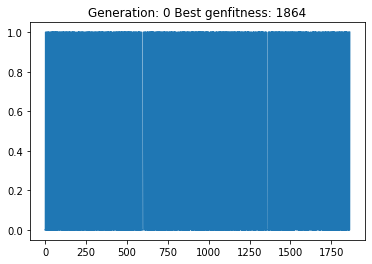

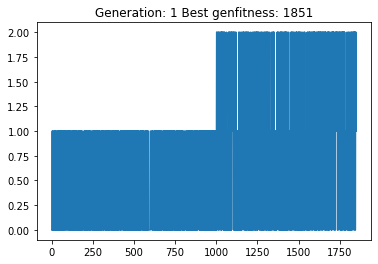

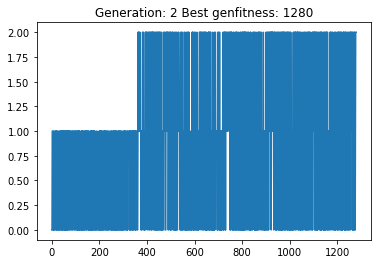

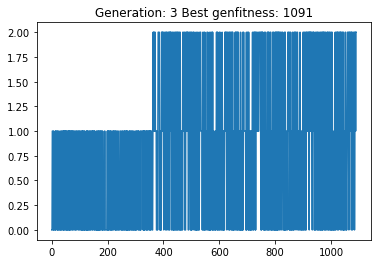

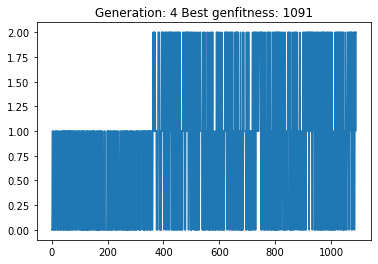

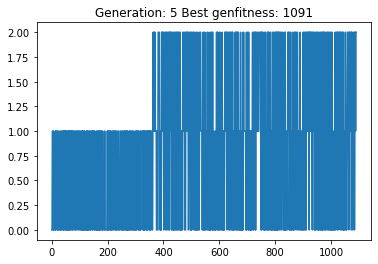

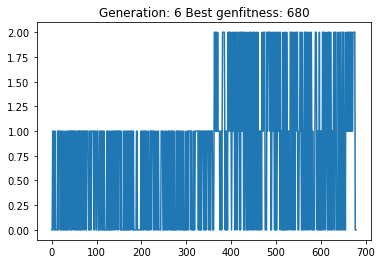

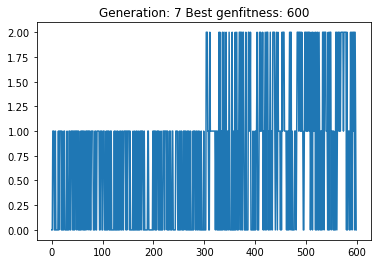

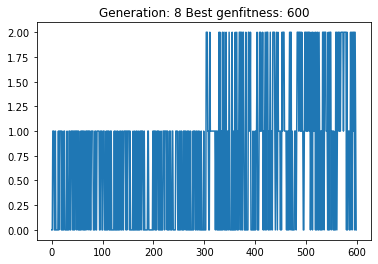

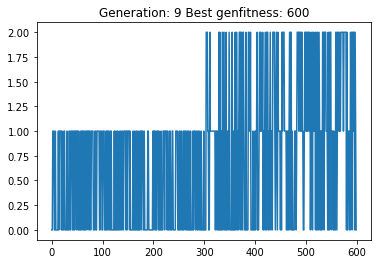

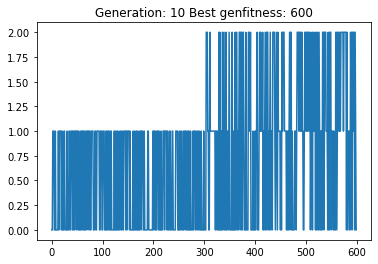

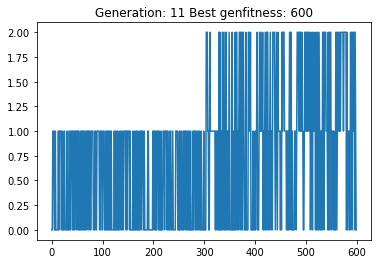

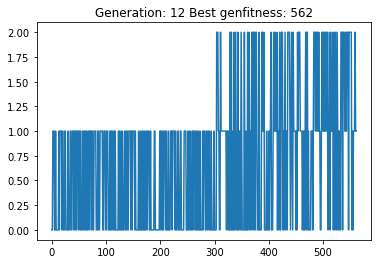

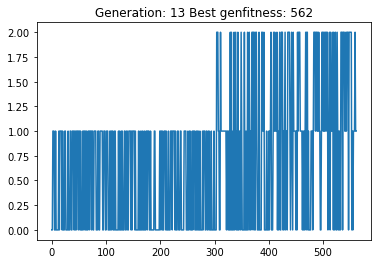

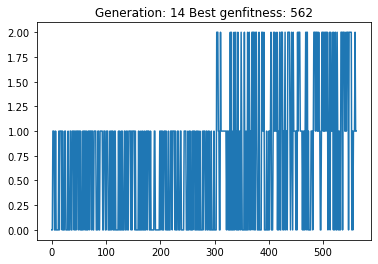

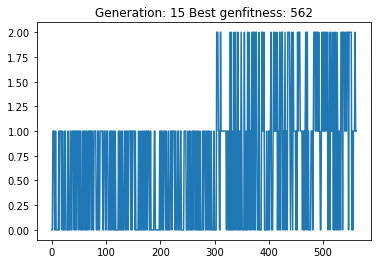

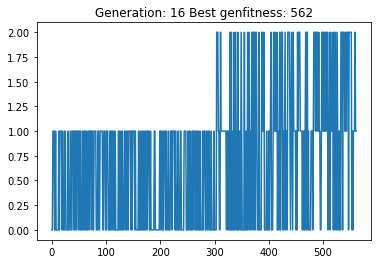

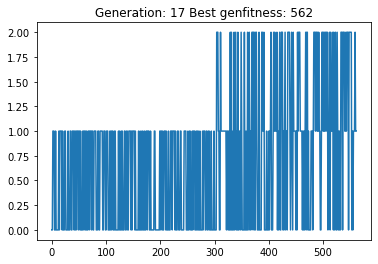

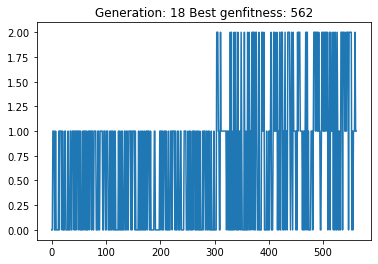

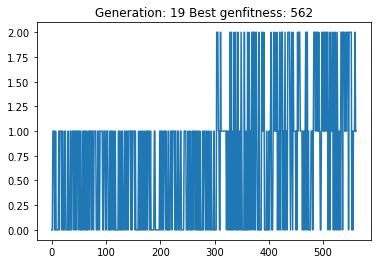

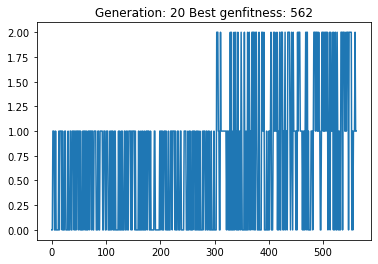

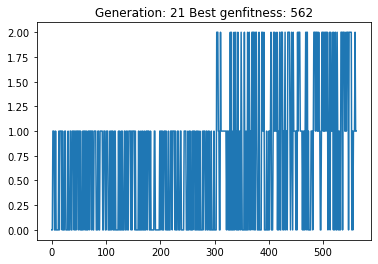

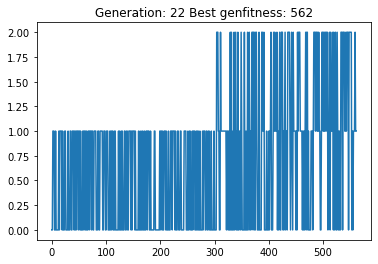

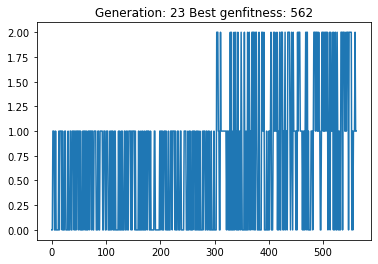

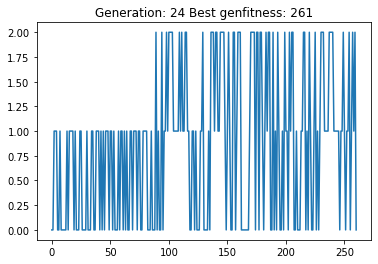

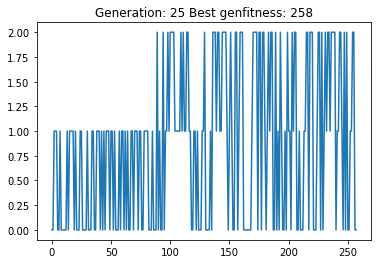

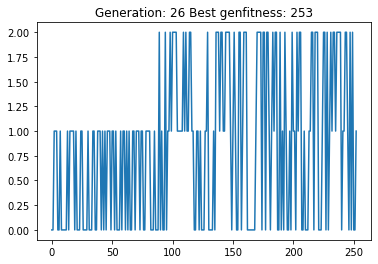

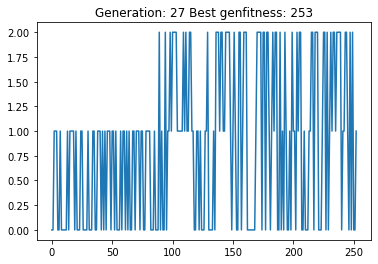

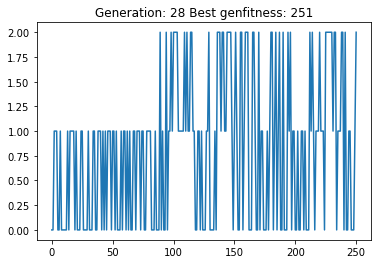

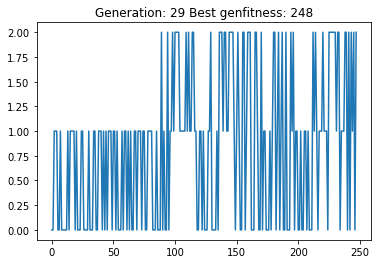

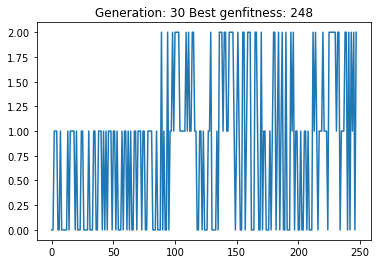

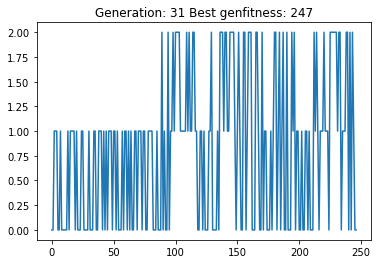

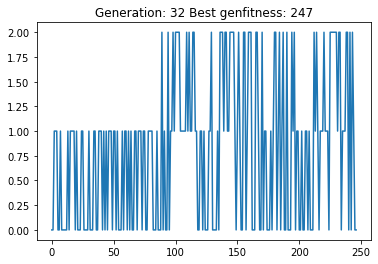

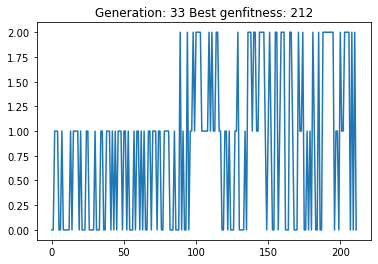

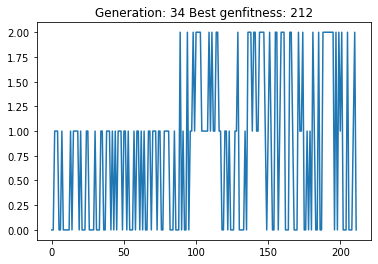

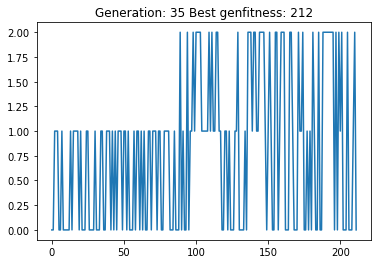

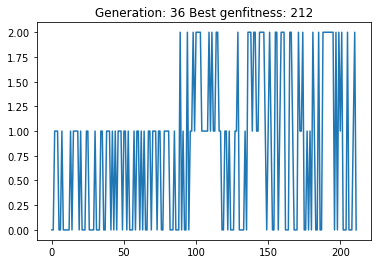

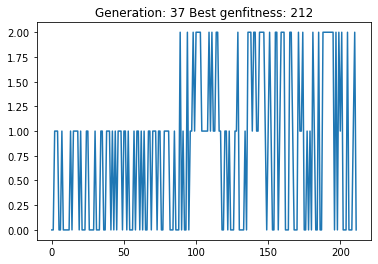

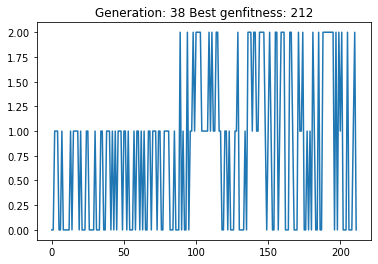

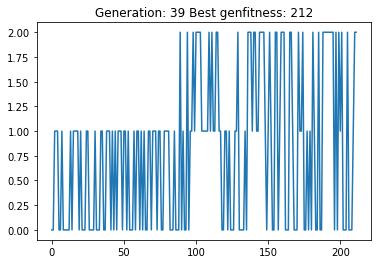

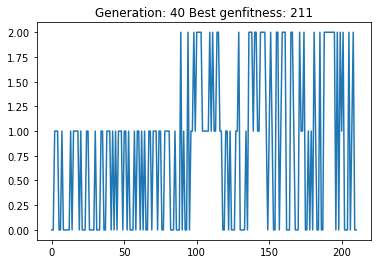

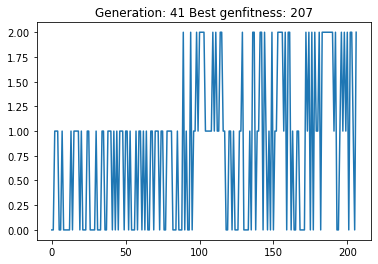

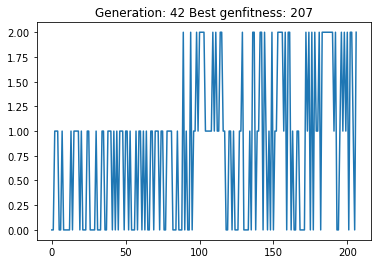

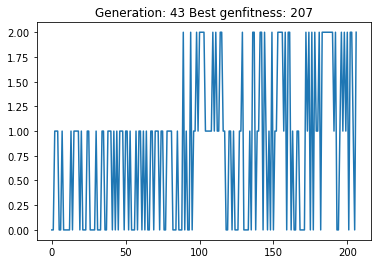

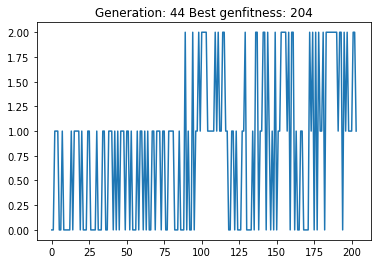

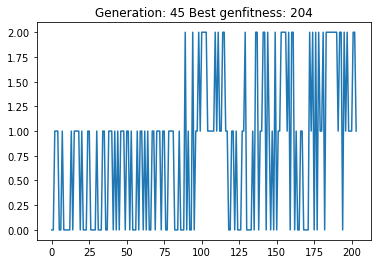

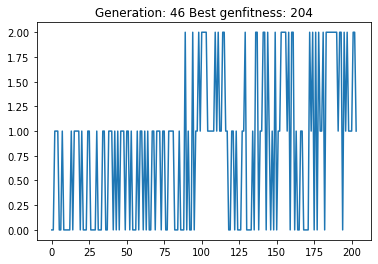

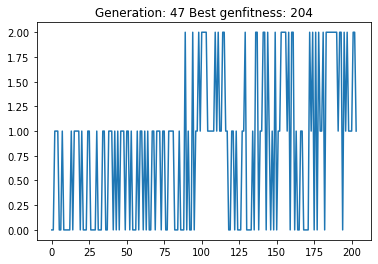

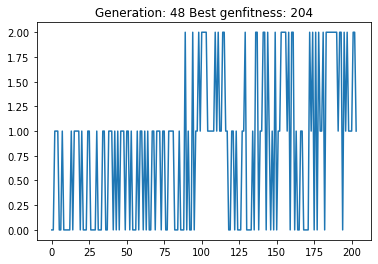

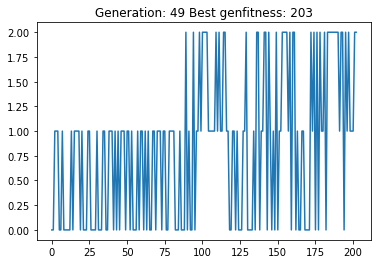

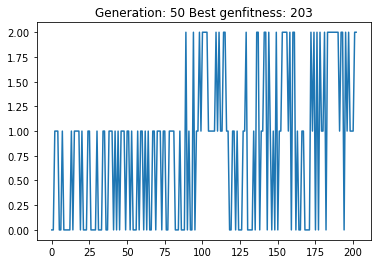

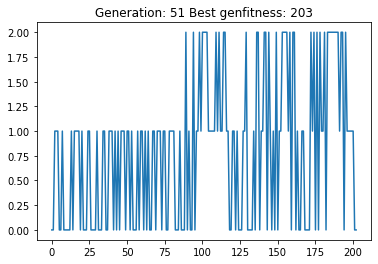

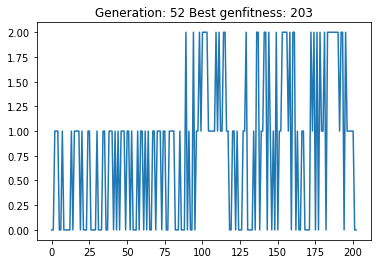

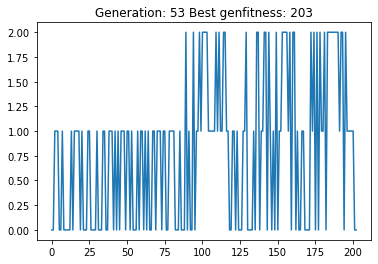

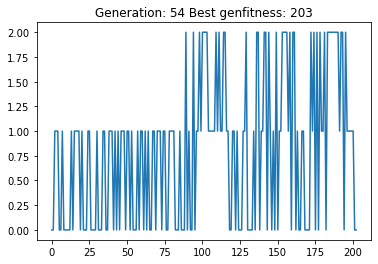

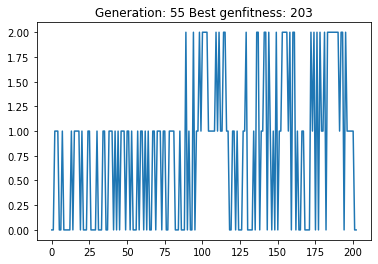

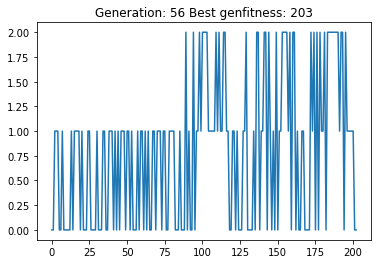

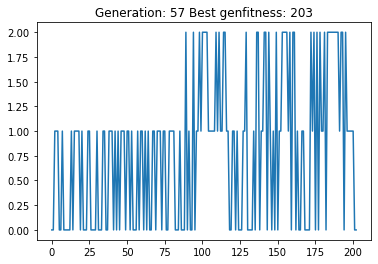

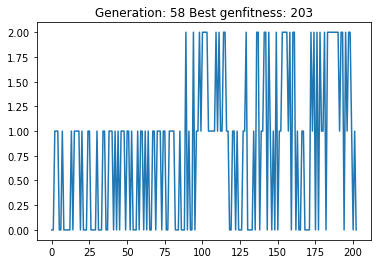

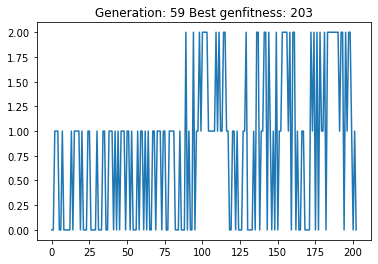

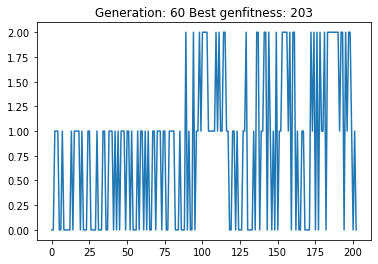

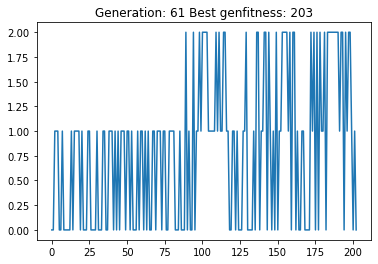

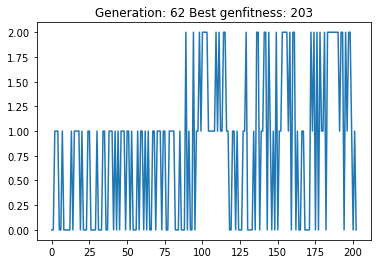

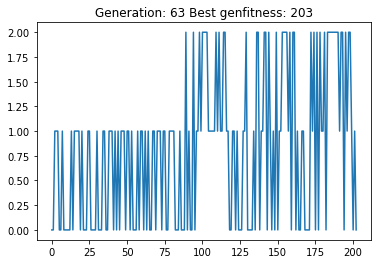

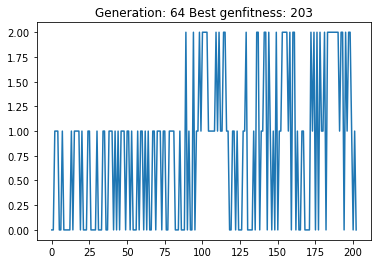

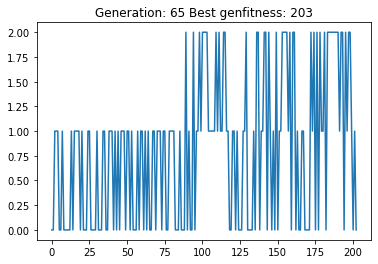

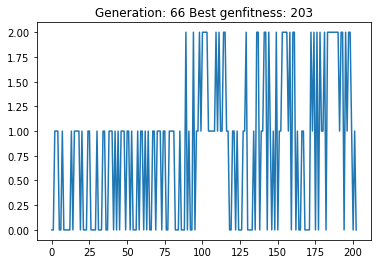

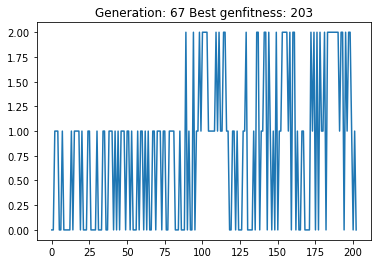

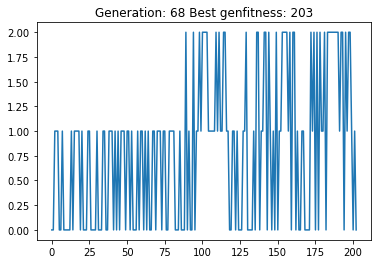

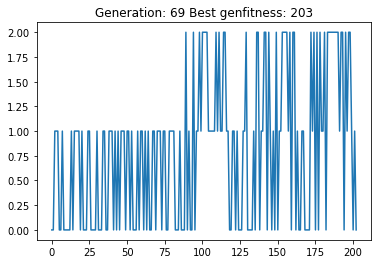

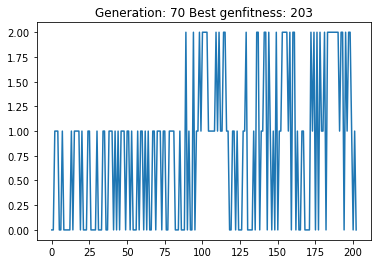

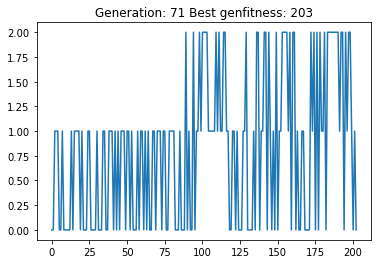

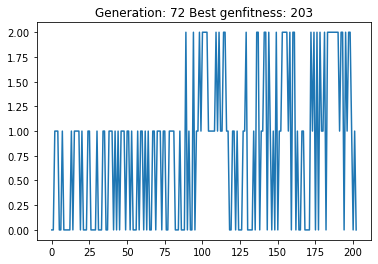

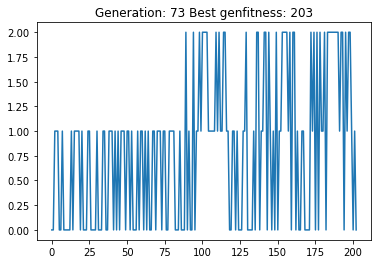

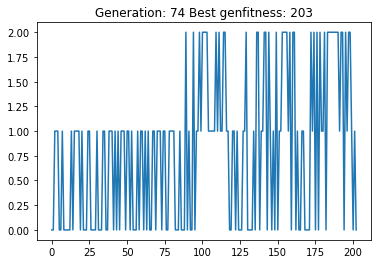

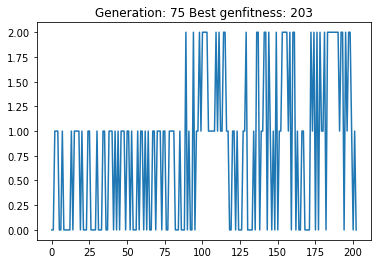

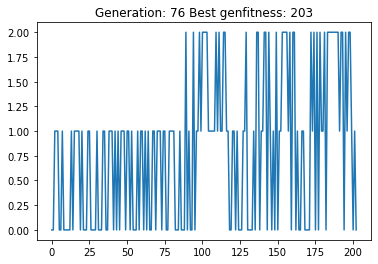

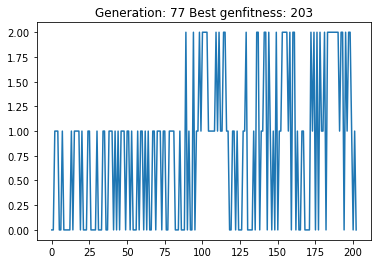

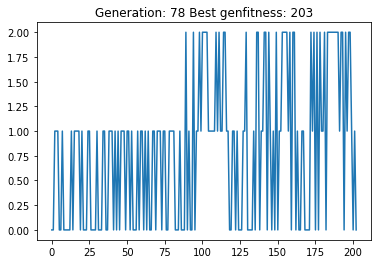

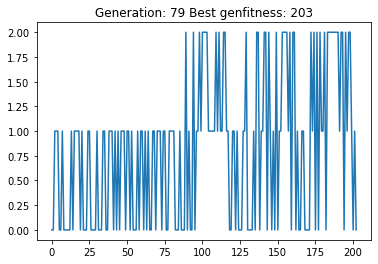

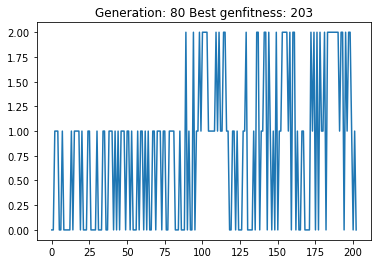

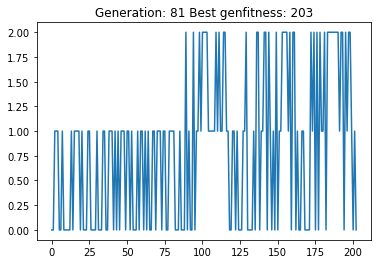

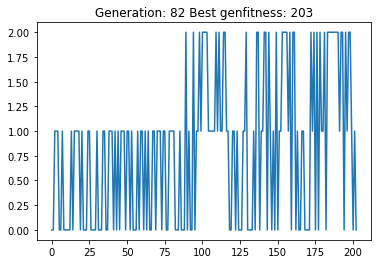

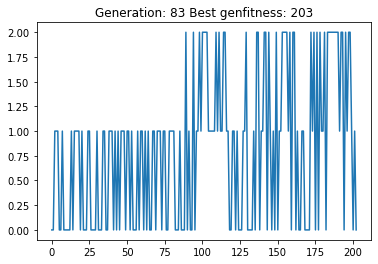

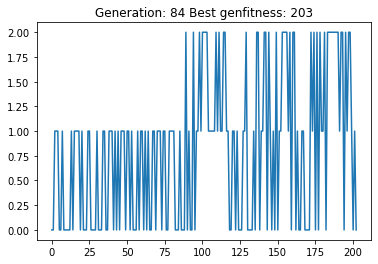

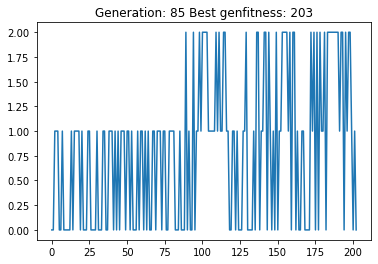

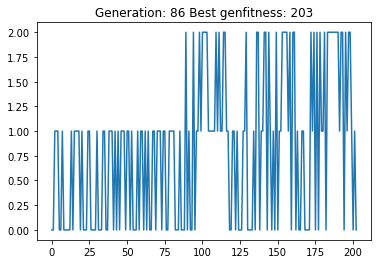

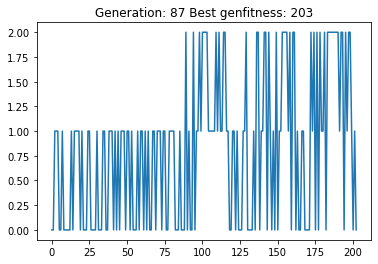

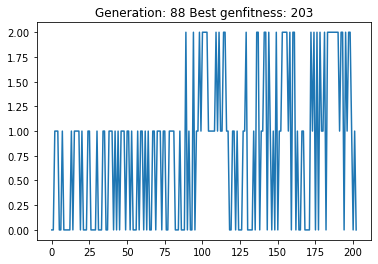

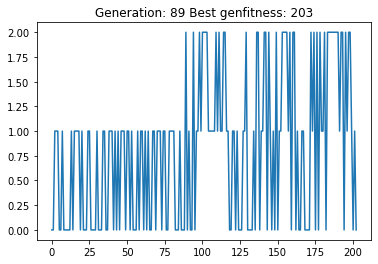

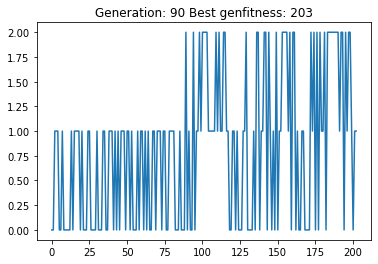

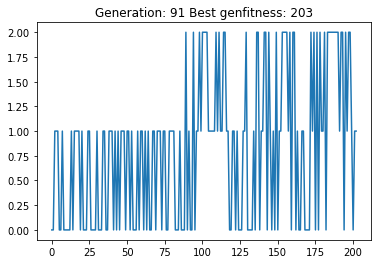

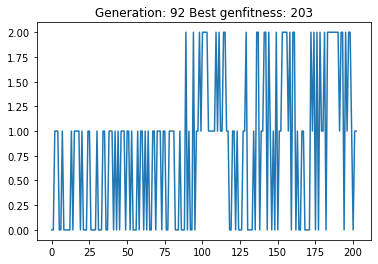

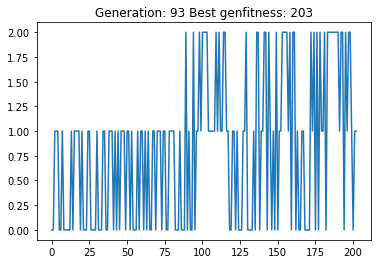

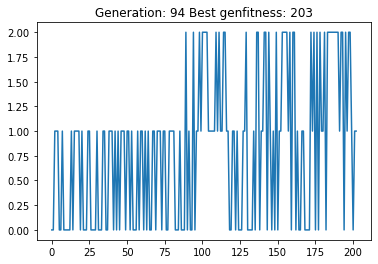

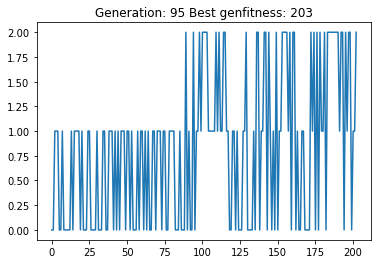

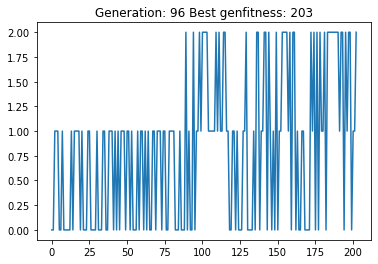

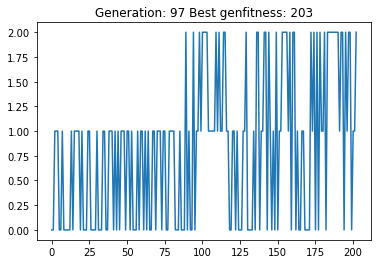

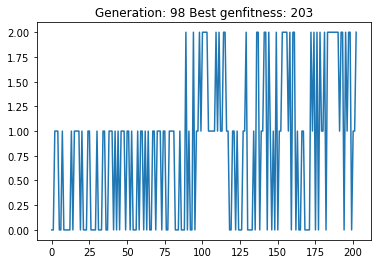

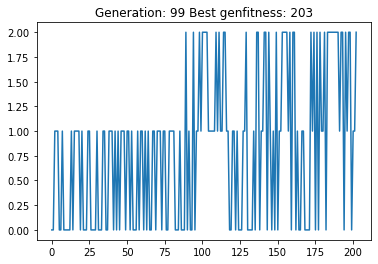

In [4]:
# Keep track of the train session
allgen = []
allgenac = []
bestgenerationarr = []
bestgenlen = []
observationarr = []
actionarr = []
Train_session = 0
generation = 0
parent_best_actions = []
duration = 0
#amount of generations to be run
num_generations = 100
for generation in range(num_generations):
    start = time.time()
    if len(allgen) == 0:
        parent_best_actions = generate_array()
        bestfromgen = parent_best_actions
        actionlen = len(parent_best_actions)
        bestgenerationarr.append(bestfromgen)
        bestgenlen.append(actionlen)
    else:
        bestfromgen = get_best_from_gen(actionarr,parent_best_actions)
        actionlen = len(bestfromgen)
        # Save the values
        bestgenerationarr.append(bestfromgen)
        bestgenlen.append(actionlen)
    # See this as the epoch of the network
    print('Generation summary: Number of actions to reach succes - ' + str(actionlen) + ' Training duration: ' + str(duration))
    print('--------------------------------------------------------------------------------------')
    print("Generation: " + str(generation) + " Parent lenght: " + str(actionlen))
    for trainsession in range(10):
        start2 = time.time()
        env.reset()
        # Save array of actions made (this is done for personal use to visualize results, to understand the enviroment)
        observationarr1= []
        actionarr1 = []
        x = -1
        action_to_be_taken = 0
        # generate random number where the steps taken in previouse algorythm is changed
        number_before_random_action = np.random.randint(0,actionlen)
        # Test whether the randomly generated number works
        # print('Random generated number: ' + str(number_before_random_action))
        while x != 0.6:
            if action_to_be_taken > actionlen*2:
                break
            else:
                env.render()
                # If you would like to print the values as they come, to test if the network is working
                # if action_to_be_taken == number_before_random_action:
                    # print('random action initiated')
                # TODO: Make random backwards too
                if action_to_be_taken > number_before_random_action:
                    # Movements from env.action_space.sample() = 0 going backwards, 1 nearly stationary and 2 going foward
                    # This statement provides random movement
                    action = env.action_space.sample()
                    observation, reward, done, info = env.step(action)
                    env.step(action)           
                else:
                    action = bestfromgen[action_to_be_taken]
                    observation, reward, done, info = env.step(action)
                    env.step(action)
            
                observationarr1.append(observation)
                x = observation[0]
                actionarr1.append(action)
                action_to_be_taken = 1 + action_to_be_taken
        observationarr.append(observationarr1)
        actionarr.append(actionarr1)
        Train_session = Train_session + 1
        end2 = time.time()
        duration2 = end2 - start2
        # if its 2x more make statement to not give options of sucess and why didnt suceed
        print('--------------------------------------------------------------------------------------')
        print('Generation: '+ str(generation) + ' Offspring: '+str(Train_session) +' Duration: ' + str(duration2) +" Actions needed to succed: " + str(len(actionarr1)))
    end = time.time()
    duration = end - start
    allgen.append(observationarr)
    allgenac.append(actionarr)
    # Reset action and observation arrays
    
    #actionarr = []
    observationarr = []
plot_graph(bestgenerationarr)
plot_graph
env.close()

# Conclusion:
I compared my results to the results on the leaderboard and saw that my network managed to find a path that was as good as the 4th/5th place. I was proud of myself since this was soemthing i made from scratch without looking at what other people had made. All the information i had from this was how to use the Gym enviroment and the lesson from Luuk. 
<br>
<br>
I know the way i created this is not the traditional method where a reward is given after every action. But for me personally it would have taken too much thinking, time and effort to create something to define the reward per step. I feel that what i have made already shows how reinforcement learning works and how it can be worked with. There are still many things i would love to improve about this network, but sadly dont have the time to do so. 
<br>
<br>
For the sake of displaying my further knowledge on the field. I will look at how other participants worked on the network and make my won implementation on this matter.

In [2]:
# For future if i would ever want to improve what i have
def train_style():
    # How is the trainign going to take place?
    # This has 3 options:
                        # 1. taking a random position and starting the trianing from there
                        # 2. taking a random position and use the steps before the random number
                        # 3. taking a random position and using the steps after the random initiation
                env.render()
                # If you would like to print the values as they come, to test if the network is working
                # if action_to_be_taken == number_before_random_action:
                    # print('random action initiated')
                # TODO: Make random backwards too
                if action_to_be_taken > number_before_random_action:
                    # Movements from env.action_space.sample() = 0 going backwards, 1 nearly stationary and 2 going foward
                    # This statement provides random movement
                    action = env.action_space.sample()
                    observation, reward, done, info = env.step(action)
                    env.step(action)           
                else:
                    action = bestfromgen[action_to_be_taken]
                    observation, reward, done, info = env.step(action)
                    env.step(action)
            
                observationarr1.append(observation)
                x = observation[0]
                actionarr1.append(action)
                action_to_be_taken = 1 + action_to_be_taken
                
def training_sessions():
    # The amount of sesisons that will be trained with. 
    # With this the amount of trainign instances cna be changed to speed up training.

IndentationError: expected an indented block (<ipython-input-2-179507a9ab6c>, line 8)